# McKinney Chapter 5 - Practice - Sec 03

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

## Announcements

1. Please keep forming groups on Canvas > People > Projects. If you want a group with more than four students, please fill a group with four students, then email with the group number and size.
2. Please keep proposing and voting for students' choice topics [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2622636).

## Five-Minute Review

The pandas package makes it easy to manipulate panel data and we will use it all semester.
Its name is an abbreviation of [*pan*el *da*ta](https://en.wikipedia.org/wiki/Panel_data):

> In statistics and econometrics, panel data and longitudinal data[1][2] are both multi-dimensional data involving measurements over time. Panel data is a subset of longitudinal data where observations are for the same subjects each time.

We will download some financial data from Yahoo! Finance to cover three important tools in pandas.

***First,*** we can use the yfinance package to easily download stock data from Yahoo! Finance.

::: {.callout-note}

Starting with version 0.2.51, the `yfinance` package changed the default behavior of the `auto_adjust` argument from `False` to `True`.
By default, the `yf.download()` function now returns adjusted prices, without including the `Adj Close` column.

We prefer to work with raw data from Yahoo! Finance and explicitly calculate returns using the `Adj Close` column.
Therefore, we will set `auto_adjust=False` in our `yf.download()` calls.
See the [yfinance changelog](https://github.com/ranaroussi/yfinance/releases?utm_source) for release version 0.2.51.

Also, I will use the `progress=False` argument to improve the readability of the PDF and website I render from these notebooks.
:::

In [3]:
df0 = yf.download(tickers='AAPL MSFT', auto_adjust=False, progress=False)

In [4]:
df0

Price      Adj Close             Close              High               Low  \
Ticker          AAPL     MSFT     AAPL     MSFT     AAPL     MSFT     AAPL   
Date                                                                         
1980-12-12    0.0988      NaN   0.1283      NaN   0.1289      NaN   0.1283   
1980-12-15    0.0937      NaN   0.1217      NaN   0.1222      NaN   0.1217   
1980-12-16    0.0868      NaN   0.1127      NaN   0.1133      NaN   0.1127   
1980-12-17    0.0890      NaN   0.1155      NaN   0.1161      NaN   0.1155   
1980-12-18    0.0915      NaN   0.1189      NaN   0.1194      NaN   0.1189   
...              ...      ...      ...      ...      ...      ...      ...   
2025-01-22  223.8300 446.2000 223.8300 446.2000 224.1200 447.2700 219.7900   
2025-01-23  223.6600 446.7100 223.6600 446.7100 227.0300 446.7500 222.3000   
2025-01-24  222.7800 444.0600 222.7800 444.0600 225.6300 446.6500 221.4100   
2025-01-27  229.8600 434.5600 229.8600 434.5600 232.1500 435.2000 223.9800   
2025-01-28  238.2600 447.2000 238.2600 447.2000 240.1900 448.3800 230.8800   

Price                   Open              Volume                
Ticker         MSFT     AAPL     MSFT       AAPL          MSFT  
Date                                                            
1980-12-12      NaN   0.1283      NaN  469033600           NaN  
1980-12-15      NaN   0.1222      NaN  175884800           NaN  
1980-12-16      NaN   0.1133      NaN  105728000           NaN  
1980-12-17      NaN   0.1155      NaN   86441600           NaN  
1980-12-18      NaN   0.1189      NaN   73449600           NaN  
...             ...      ...      ...        ...           ...  
2025-01-22 436.0000 219.7900 437.5600   64126500 27803800.0000  
2025-01-23 441.5000 224.7400 442.0000   60234800 18389300.0000  
2025-01-24 441.4000 224.7800 445.1600   54697900 15549500.0000  
2025-01-27 423.5000 224.0200 424.0100   94863400 35647800.0000  
2025-01-28 431.4250 230.8800 434.6000   75122318 23138065.0000  

[11122 rows x 12 columns]

***Second,*** we can slice rows and columns two ways: by integer locations with `.iloc[]` and by labels with `.loc[]`

In [5]:
df0.iloc[:6, :6]

Price      Adj Close       Close        High     
Ticker          AAPL MSFT   AAPL MSFT   AAPL MSFT
Date                                             
1980-12-12    0.0988  NaN 0.1283  NaN 0.1289  NaN
1980-12-15    0.0937  NaN 0.1217  NaN 0.1222  NaN
1980-12-16    0.0868  NaN 0.1127  NaN 0.1133  NaN
1980-12-17    0.0890  NaN 0.1155  NaN 0.1161  NaN
1980-12-18    0.0915  NaN 0.1189  NaN 0.1194  NaN
1980-12-19    0.0971  NaN 0.1261  NaN 0.1267  NaN

In [6]:
df0.loc[:'1980-12-19', :'High']

Price      Adj Close       Close        High     
Ticker          AAPL MSFT   AAPL MSFT   AAPL MSFT
Date                                             
1980-12-12    0.0988  NaN 0.1283  NaN 0.1289  NaN
1980-12-15    0.0937  NaN 0.1217  NaN 0.1222  NaN
1980-12-16    0.0868  NaN 0.1127  NaN 0.1133  NaN
1980-12-17    0.0890  NaN 0.1155  NaN 0.1161  NaN
1980-12-18    0.0915  NaN 0.1189  NaN 0.1194  NaN
1980-12-19    0.0971  NaN 0.1261  NaN 0.1267  NaN

::: {.callout-note}

To slice a DataFrame:

- Use `['Name']` to select specific columns by their names.
- Use `.loc[]` to slice rows, or rows and columns together, with labels or conditional expressions.

:::

In [7]:
df0['High']

Ticker,AAPL,MSFT
Date,,
1980-12-12,0.1289,NaN
1980-12-15,0.1222,NaN
1980-12-16,0.1133,NaN
1980-12-17,0.1161,NaN
1980-12-18,0.1194,NaN
...,...,...
2025-01-22,224.1200,447.2700
2025-01-23,227.0300,446.7500
2025-01-24,225.6300,446.6500


In [8]:
# # KeyError: '1980-12-12'
# df0['1980-12-12']

***Note, if we use string labels, like dates and words, pandas includes left and right edges!***
This string label behavior differs from the integer location behavior everywhere else in Python.
However, it is easy to figure out the sequence of integer locations.
It is difficult to figure our the sequence of string labels.

***Third,*** there many methods we can apply to pandas objects (and chain)!
At this point in the course, our most common methods will be:

1. `.pct_change()` to calculate simple returns from adjusted close prices
2. `.plot()` to quickly plot pandas objects
3. `.mean()`, `.std()`, `.describe()`, etc. to calculate summary statistics

<Axes: xlabel='Date'>

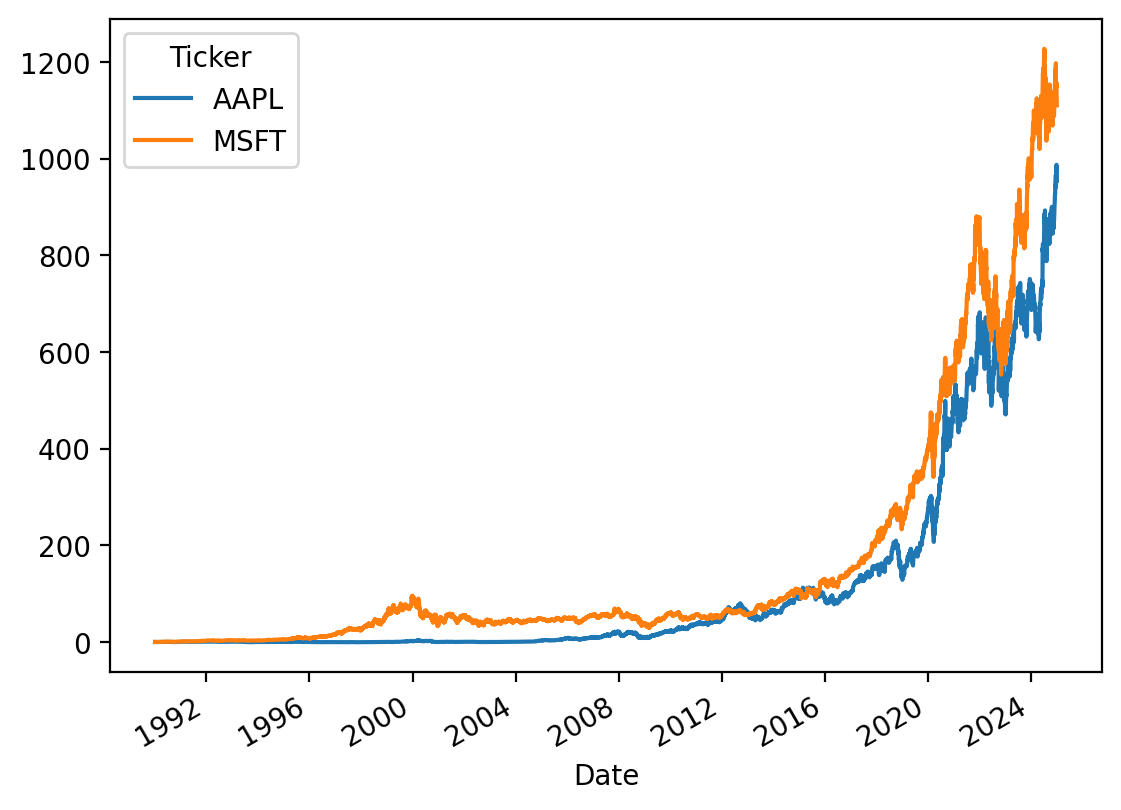

In [9]:
(
    df0  # DataFrame containing AAPL and MSFT data from 1980-12-12 through today
    .loc['1990':'2024', 'Adj Close']  # Slice rows for 1990-2024 (inclusive) and the 'Adj Close' column
    .pct_change()  # Calculate daily percentage changes in 'Adj Close' (includes dividends and splits)
    .add(1)  # Prepare for compounding by adding 1 to daily returns
    .cumprod()  # Compute cumulative product to get total return for each day since the start
    .sub(1)  # Convert back to cumulative returns
    .plot()  # Plot cumulative returns
)

The plot above is in decimal returns!
pandas makes it easy to generate plots, but getting them beautiful and readable takes more work.
The following code adds a title, labels, and formats the y axis.

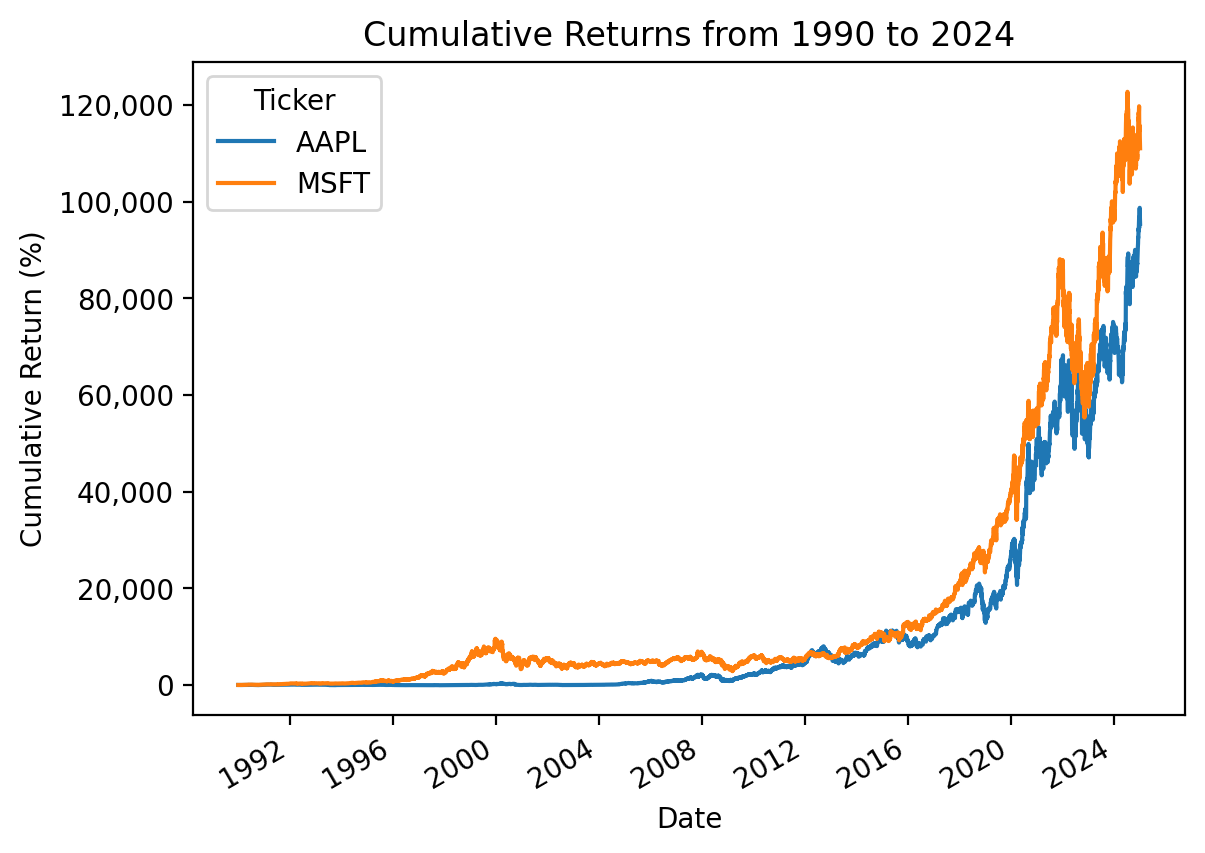

In [10]:
from matplotlib.ticker import FuncFormatter

# Plot the data
ax = df0.loc['1990':'2024', 'Adj Close'].pct_change().add(1).cumprod().sub(1).plot()

# Format y-axis as percentages with comma separators
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

# Add labels and title if needed
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns from 1990 to 2024')

# Show the plot and suppress text output (<Axes: xlabel='Date'> above)
plt.show()

## Practice

### What are the mean daily returns for these four stocks?

In [11]:
tickers = 'AAPL IBM MSFT GOOG'

In [12]:
returns = (
    yf.download(tickers=tickers, auto_adjust=False, progress=False)
    ['Adj Close']
    .pct_change()
)

In [13]:
(
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .mean() # calculate mean of daily returns from GOOG IPO through yesterday
)

Ticker
AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [14]:
(
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .std() # calculate standard deviation (volatility) of daily returns from GOOG IPO through yesterday
)

Ticker
AAPL   0.0204
GOOG   0.0193
IBM    0.0143
MSFT   0.0170
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

In [15]:
ann_means = (
    returns # daily returns from 1962 through today
    .dropna() # drop days with missing returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .mean() # calculate mean of daily returns from close of GOOG IPO through yesterday
    .mul(252) # means grow linearly with time, so multiply by 252
)

ann_means

Ticker
AAPL   0.3568
GOOG   0.2599
IBM    0.1050
MSFT   0.1956
dtype: float64

In [16]:
ann_stds = (
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .std() # calculate mean of daily returns from close of GOOG IPO through yesterday
    .mul(np.sqrt(252)) # variances grow linearly with time, so standard deviations grow sqrt(T), so multiply by sqrt(252)
)

ann_stds

Ticker
AAPL   0.3237
GOOG   0.3059
IBM    0.2265
MSFT   0.2693
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Here is a crude plot!

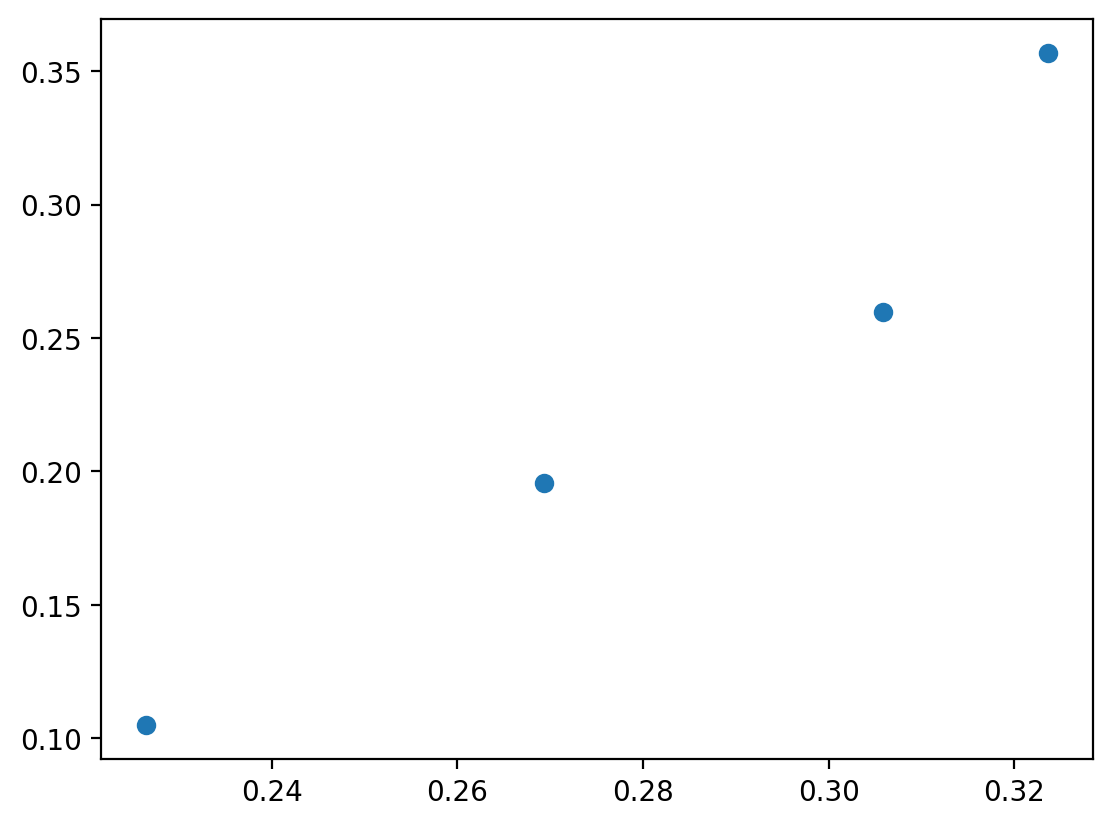

In [17]:
plt.scatter(x=ann_stds, y=ann_means)

::: {.callout-important}
Before we meet on Friday, improve the plot above
:::

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We must download new data, into `tickers_2`, `data_2`, and `returns_2`.

### Calculate total returns for the stocks in the DJIA

### Plot the distribution of total returns for the stocks in the DJIA

### Which stocks have the minimum and maximum total returns?

### Plot the cumulative returns for the stocks in the DJIA

### Repeat the plot above with only the minimum and maximum total returns